<a href="https://colab.research.google.com/github/ciarangray0/GAA-Video-Analysis/blob/main/YOLO_Bytetrack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install libs
!pip install -q ultralytics roboflow
!pip install -q matplotlib opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 126.7 MB/s eta 0:00:00


In [2]:
#download dataset from Roboflow
from roboflow import Roboflow
from google.colab import userdata
ROB_OFLOW_API_KEY = userdata.get('roboflowAPI')
WORKSPACE = userdata.get('roboflowWorkspace')
PROJECT = userdata.get('roboflowProject')
VERSION = 4

rf = Roboflow(api_key=ROB_OFLOW_API_KEY)
proj = rf.workspace(WORKSPACE).project(PROJECT)
dataset = proj.version(VERSION).download("yolov8")  # downloads YOLOv8-ready folder

print("Dataset downloaded to:", dataset.location)



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to GAA-Player-Detection-FYP-4 in yolov8:: 100%|██████████| 444/444 [00:00<00:00, 2666.60it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dataset downloaded to: /content/GAA-Player-Detection-FYP-4


Data root: /content/GAA-Player-Detection-FYP-4
Train images: 198
Val images  : 9
Sample image: /content/GAA-Player-Detection-FYP-4/train/images/010-000937_-_Scores_For_frame0008_jpg.rf.b09c566d1688165b1834d84a0b204e58.jpg


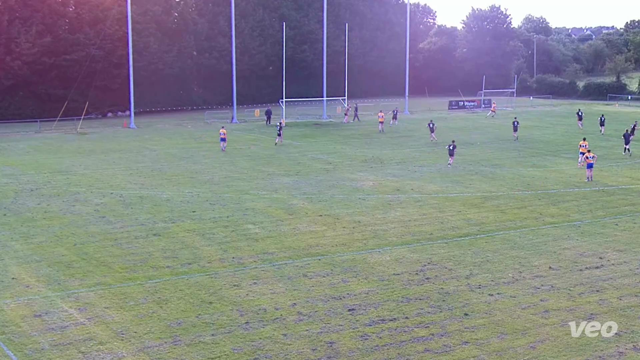

Label file: /content/GAA-Player-Detection-FYP-4/train/labels/010-000937_-_Scores_For_frame0008_jpg.rf.b09c566d1688165b1834d84a0b204e58.txt
1 0.34903125 0.3836203703703704 0.02722916666666665 0.09316666666666668
1 0.43759374999999995 0.36779629629629634 0.016848958333333285 0.06891666666666672
1 0.5432708333333333 0.3136203703703703 0.011546875000000038 0.06427777777777774
1 0.595046875 0.33725 0.017177083333333343 0.059685185185185216
1 0.6181145833333334 0.32234259259259257 0.01747916666666664 0.052092592592592586
1 0.6765364583333333 0.3625555555555556 0.019734374999999933 0.06955555555555556
1 0.7059791666666667 0.42262962962962963 0.016125000000000018 0.07118518518518518
1 0.7720572916666666 0.3053703703703704 0.012864583333333238 0.05147222222222225
1 0.8058125 0.3606759259259259 0.017869791666666638 0.0694907407407407
1 0.9037708333333333 0.3276296296296296 0.022119791666666562 0.05895370370370367
1 0.9419947916666668 0.34251851851851856 0.013161458333333324 0.06281481481481485
1

In [3]:
#quick check,  list files and show a sample image with label
import os, random
from pathlib import Path
from PIL import Image, ImageOps, ImageDraw

data_dir = Path("/content/GAA-Player-Detection-FYP-4")
print("Data root:", data_dir)
print("Train images:", len(list((data_dir/"train"/"images").glob("*.jpg"))))
print("Val images  :", len(list((data_dir/"valid"/"images").glob("*.jpg"))))

# show a random train image and its label file
img_files = list((data_dir/"train"/"images").glob("*.jpg"))
if img_files:
    img_path = random.choice(img_files)
    print("Sample image:", img_path)
    display(Image.open(img_path).resize((640,360)))
    label_path = img_path.with_suffix(".txt").as_posix().replace("/images/","/labels/")
    print("Label file:", label_path)
    if os.path.exists(label_path):
        print(open(label_path).read())


In [3]:
# train YOLOv8 model
from ultralytics import YOLO
import os

data_yaml = os.path.join(dataset.location, "data.yaml")
print("Using data config:", data_yaml)

# choose model backbone
# yolov8n.pt (nano) is fastest
model = YOLO("yolov8n.pt")

#train -- tweak epochs/imgsz/batch depending on GPU and dataset size
model.train(
    data=data_yaml,
    epochs=50,
    imgsz=640,
    batch=16,
    name="gaa_player_train_colab"
)

# trained weights will be under runs/detect/gaa_player_train_colab/weights/best.pt


Using data config: /content/GAA-Player-Detection-FYP-4/data.yaml
Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/GAA-Player-Detection-FYP-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=gaa_player_train_colab, nbs=64, nms=False, opset=None, o

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a44c4b3ea50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [5]:
# run inference on test images and save outputs
from ultralytics import YOLO
from pathlib import Path

#load best trained model
best = "runs/detect/gaa_player_train_colab/weights/best.pt"
model = YOLO(best)

#run predictions on the test set and save results
test_images = str(Path("/content/GAA-Player-Detection-FYP-4") / "valid" / "images")
print("Running inference on:", test_images)
model.predict(source=test_images, save=True, conf=0.1, line_thickness=1)

#predictions saved to runs/detect/predict by default (or runs/detect/predict2..)


Running inference on: /content/GAA-Player-Detection-FYP-4/valid/images
WARNING ⚠️ 'line_thickness' is deprecated and will be removed in the future. Use 'line_width' instead.

image 1/9 /content/GAA-Player-Detection-FYP-4/valid/images/012-001032_-_Scores_For_frame0045_jpg.rf.ba44c3b0ef104fe3534aac25a13b10da.jpg: 384x640 22 GAA-player-lablerss, 1 Refree-lablers, 226.8ms
image 2/9 /content/GAA-Player-Detection-FYP-4/valid/images/040-002318_-_Scores_For_frame0000_jpg.rf.d729d54bc73805db8ada3f62869567fb.jpg: 384x640 26 GAA-player-lablerss, 1 Refree-lablers, 21.2ms
image 3/9 /content/GAA-Player-Detection-FYP-4/valid/images/040-002318_-_Scores_For_frame0017_jpg.rf.2b96c6a49132b2e687d0ff0b76ee079a.jpg: 384x640 13 GAA-player-lablerss, 1 Refree-lablers, 58.6ms
image 4/9 /content/GAA-Player-Detection-FYP-4/valid/images/040-002318_-_Scores_For_frame0030_jpg.rf.a707b13269f1ac878aedff53ff3c782b.jpg: 384x640 18 GAA-player-lablerss, 1 Refree-lablers, 26.8ms
image 5/9 /content/GAA-Player-Detection-FYP-

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Ball-labelers', 1: 'GAA-player-lablers', 2: 'Refree-lablers'}
 obb: None
 orig_img: array([[[ 81,  65,  72],
         [ 80,  64,  71],
         [ 79,  61,  68],
         ...,
         [255, 255, 249],
         [255, 255, 249],
         [255, 255, 249]],
 
        [[ 81,  65,  72],
         [ 80,  64,  71],
         [ 80,  62,  69],
         ...,
         [255, 255, 249],
         [255, 255, 249],
         [255, 255, 249]],
 
        [[ 81,  65,  72],
         [ 81,  65,  72],
         [ 82,  64,  71],
         ...,
         [255, 255, 249],
         [255, 255, 249],
         [255, 255, 249]],
 
        ...,
 
        [[ 95, 149, 120],
         [ 98, 152, 123],
         [101, 155, 126],
         ...,
         [ 88, 131, 104],
         [ 83, 128, 102],
         [ 80, 127, 101]],
 
        [[ 96, 150, 121],
         [102, 156, 127],
     

In [7]:
# run tracking (YOLOv8 + ByteTrack)
#
from ultralytics import YOLO
video_path = "/content/040 002429_-_Scores_For.mp4"
best = "runs/detect/gaa_player_train_colab/weights/best.pt"
model = YOLO(best)

#this uses the built-in tracker integration
# output saved automatically.
model.track(source=video_path, tracker="bytetrack.yaml", save=True, conf=0.35, show=True, line_thickness=1)
#output video saved to runs/track/exp


requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 2 packages in 225ms
Prepared 1 package in 55ms
Installed 1 package in 1ms
 + lap==0.5.12

requirements: AutoUpdate success ✅ 0.7s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect

WARNING ⚠️ 'line_thickness' is deprecated and will be removed in the future. Use 'line_width' instead.
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outpu

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Ball-labelers', 1: 'GAA-player-lablers', 2: 'Refree-lablers'}
 obb: None
 orig_img: array([[[255, 255, 251],
         [255, 255, 251],
         [255, 255, 251],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 251],
         [255, 255, 251],
         [255, 255, 251],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 251],
         [255, 255, 251],
         [255, 255, 251],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[ 13,  62,  45],
         [ 13,  62,  45],
         [ 13,  62,  45],
         ...,
         [  2,  51,  34],
         [  7,  54,  37],
         [  7,  54,  37]],
 
        [[ 15,  62,  45],
         [ 15,  62,  45],
     

In [8]:
#expirementing with mapping techniques
import cv2
import numpy as np
import pandas as pd
from ultralytics import YOLO

# -----------------------------
# Load tracked video
# -----------------------------
video_path = "/content/040 002429_-_Scores_For.mp4"
model = YOLO("runs/detect/gaa_player_train_colab/weights/best.pt")

x1_pixel = 327
y1_pixel = 381

x2_pixel = 436
y2_pixel = 366

x3_pixel = 877
y3_pixel = 311

x4_pixel = 1487
y4_pixel = 314

# Track players (no video output)
results = model.track(
    source=video_path,
    tracker="bytetrack.yaml",
    save=False,
    show=False,
    conf=0.25
)

# -----------------------------
# Choose a reference frame
# -----------------------------
# Pick a frame where most of the pitch is visible
ref_frame_idx = 40
ref_frame_img = results[ref_frame_idx].orig_img

# -----------------------------
# Define known points in reference frame
# -----------------------------
# Pixel coordinates in reference frame
pts_frame_ref = np.array([
    [x1_pixel, y1_pixel],  # bottom left goalpost
    [x2_pixel, y2_pixel],  # bottom right goalpost
    [x3_pixel, y3_pixel],  # corner flag (lhs)
    [x4_pixel, y4_pixel]   # 45 m line (lhs)
], dtype=np.float32)

# Corresponding real-world pitch coordinates (meters)
pts_pitch_ref = np.array([
    [39.25, 0], # bottom left goalpost
    [45.75, 0], # bottom right goalpost
    [85, 0], # corner flag (lhs)
    [85, 45] # 45 m line (lhs)
], dtype=np.float32)

# Compute homography from reference frame → pitch meters
H_ref, status = cv2.findHomography(pts_frame_ref, pts_pitch_ref)

# -----------------------------
# Extract features from reference frame
# -----------------------------
orb = cv2.ORB_create(5000)
ref_gray = cv2.cvtColor(ref_frame_img, cv2.COLOR_BGR2GRAY)
kp_ref, des_ref = orb.detectAndCompute(ref_gray, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# -----------------------------
#  Process all frames and map player coordinates
# -----------------------------
trajectory_data = []

for frame_idx, frame_result in enumerate(results):
    frame_gray = cv2.cvtColor(frame_result.orig_img, cv2.COLOR_BGR2GRAY)

    # Detect features in current frame
    kp_frame, des_frame = orb.detectAndCompute(frame_gray, None)
    if des_frame is None or len(kp_frame) < 10:
        continue  # skip frame

    # Match features to reference frame
    matches = bf.match(des_frame, des_ref)
    if len(matches) < 4:
        continue  # need at least 4 matches for homography

    matches = sorted(matches, key=lambda x: x.distance)[:50]  # top matches
    pts_frame = np.float32([kp_frame[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    pts_ref = np.float32([kp_ref[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute frame → reference homography
    H_frame, status = cv2.findHomography(pts_frame, pts_ref, cv2.RANSAC, 5.0)
    if H_frame is None:
        continue

    # Map each player bbox center to reference frame, then to pitch meters
    boxes = frame_result.boxes
    for box, cls, conf, track_id in zip(boxes.xyxy, boxes.cls, boxes.conf, boxes.id):
        x1, y1, x2, y2 = box
        x_c = (x1 + x2) / 2
        y_c = (y1 + y2) / 2

        pixel = np.array([x_c, y_c, 1]).reshape(3, 1)

        # Apply frame → reference, then reference → pitch
        pitch_coord = H_ref @ (H_frame @ pixel)
        pitch_coord /= pitch_coord[2, 0]  # normalize

        x_pitch, y_pitch = pitch_coord[0, 0], pitch_coord[1, 0]

        # Approximate bbox size in meters
        video_width = frame_result.orig_img.shape[1]
        video_height = frame_result.orig_img.shape[0]
        width_m = (x2 - x1) * (80 / video_width)
        height_m = (y2 - y1) * (140 / video_height)

        trajectory_data.append([
            frame_idx, int(track_id), x_pitch, y_pitch, width_m, height_m, float(conf)
        ])

# -----------------------------
# Save CSV
# -----------------------------
columns = ["frame", "player_id", "x_m", "y_m", "bbox_width_m", "bbox_height_m", "conf"]
df = pd.DataFrame(trajectory_data, columns=columns)
df.to_csv("player_trajectories_dynamic_reference.csv", index=False)
print("Trajectories saved to player_trajectories_dynamic_reference.csv")



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/346) /content/040 002429_-_Scores_For.mp4: 384x640 18 GAA-player-lablerss, 7.7ms
video 1/1 (frame 2/346) /content/040 002429_-_Scores_For.mp4: 384x640 14 GAA-player-lablerss, 7.6ms
video 1/1 (frame 3/346) /content/040 002429_-_Scores_For.mp4: 384x640 13 GAA-player-lablerss, 11.4ms
video 1/1 (frame 4/346) /content/040 002429_-_Scores_For.mp4: 384x640 11 GAA-player-lablerss, 7.2ms
video 1/1 (frame 5/346) /content/040 002429_-_Scores_Fo

In [ ]:
import cv2
import numpy as np
import pandas as pd
from ultralytics import YOLO

# -----------------------------
#  Load tracked video
# -----------------------------
video_path = "/content/040 002429_-_Scores_For.mp4"
model = YOLO("runs/detect/gaa_player_train_colab/weights/best.pt")

x1_pixel = 327
y1_pixel = 381

x2_pixel = 436
y2_pixel = 366

x3_pixel = 877
y3_pixel = 311

x4_pixel = 1487
y4_pixel = 314

x5_pixel = 431
y5_pixel = 438

x6_pixel = 863
y6_pixel = 361

x7_pixel = 381
y7_pixel = 417

x8_pixel = 700
y8_pixel = 366

x9_pixel = 534
y9_pixel = 367

x10_pixel = 312
y10_pixel = 398

x11_pixel = 1109
y11_pixel = 309

# -----------------------------
#  Choose a reference frame
# -----------------------------
ref_frame_idx = 40
ref_frame_img = results[ref_frame_idx].orig_img

# -----------------------------
#  Define known points in reference frame
# -----------------------------
# Pixel coordinates in reference frame
pts_frame_ref = np.array([
    [x1_pixel, y1_pixel],  # bottom left goalpost
    [x2_pixel, y2_pixel],  # bottom right goalpost
    [x3_pixel, y3_pixel],  # corner flag (lhs)
    [x4_pixel, y4_pixel],  # 45 m line (lhs)
    [x5_pixel, y5_pixel],  # left semi circle
    [x6_pixel, y6_pixel],  # right semi circle
    [x7_pixel, y7_pixel],  # left 13m box
    [x8_pixel, y8_pixel],  # right 13m box
    [x9_pixel, y9_pixel],  # left goalie box
    [x10_pixel, y10_pixel], # right goalie box
    [x11_pixel, y11_pixel] # left 21
], dtype=np.float32)

# Corresponding real-world pitch coordinates (meters)
pts_pitch_ref = np.array([
    [39.25, 0], # bottom left goalpost
    [45.75, 0], # bottom right goalpost
    [85, 0], # corner flag (lhs)
    [85, 45], # 45 m line (lhs)
    [33, 20], #
    [52, 20], #
    [33, 13], #
    [52, 13], #
    [35.5, 4.5],
    [49.5, 4.5],
    [85, 20]
], dtype=np.float32)

# Compute homography from reference frame → pitch meters
H_ref, status = cv2.findHomography(pts_frame_ref, pts_pitch_ref)

# -----------------------------
#  Extract features from reference frame
# -----------------------------
orb = cv2.ORB_create(5000)
ref_gray = cv2.cvtColor(ref_frame_img, cv2.COLOR_BGR2GRAY)
kp_ref, des_ref = orb.detectAndCompute(ref_gray, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# -----------------------------
#  Process all frames and map player coordinates
# -----------------------------
trajectory_data = []

for frame_idx, frame_result in enumerate(results):
    frame_gray = cv2.cvtColor(frame_result.orig_img, cv2.COLOR_BGR2GRAY)

    # Detect features in current frame
    kp_frame, des_frame = orb.detectAndCompute(frame_gray, None)
    if des_frame is None or len(kp_frame) < 10:
        continue  # skip frame

    # Match features to reference frame
    matches = bf.match(des_frame, des_ref)
    if len(matches) < 4:
        continue  # need at least 4 matches for homography

    matches = sorted(matches, key=lambda x: x.distance)[:50]  # top matches
    pts_frame = np.float32([kp_frame[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    pts_ref = np.float32([kp_ref[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute frame → reference homography
    H_frame, status = cv2.findHomography(pts_frame, pts_ref, cv2.RANSAC, 5.0)
    if H_frame is None:
        continue

    # Map each player bbox center to reference frame, then to pitch meters
    boxes = frame_result.boxes
    for box, cls, conf, track_id in zip(boxes.xyxy, boxes.cls, boxes.conf, boxes.id):
        x1, y1, x2, y2 = box
        x_c = (x1 + x2) / 2
        y_c = (y1 + y2) / 2

        pixel = np.array([x_c, y_c, 1]).reshape(3, 1)

        # Apply frame → reference, then reference → pitch
        pitch_coord = H_ref @ (H_frame @ pixel)
        pitch_coord /= pitch_coord[2, 0]  # normalize

        x_pitch, y_pitch = pitch_coord[0, 0], pitch_coord[1, 0]

        # Approximate bbox size in meters
        video_width = frame_result.orig_img.shape[1]
        video_height = frame_result.orig_img.shape[0]
        width_m = (x2 - x1) * (80 / video_width)
        height_m = (y2 - y1) * (140 / video_height)

        trajectory_data.append([
            frame_idx, int(track_id), x_pitch, y_pitch, width_m, height_m, float(conf)
        ])

# -----------------------------
#  Save CSV
# -----------------------------
columns = ["frame", "player_id", "x_m", "y_m", "bbox_width_m", "bbox_height_m", "conf"]
df = pd.DataFrame(trajectory_data, columns=columns)
df.to_csv("player_trajectories_dynamic_reference.csv", index=False)
print("Trajectories saved to player_trajectories_dynamic_reference.csv")